This notebook is meant to discover the library LightGraphs that will be used for the project, as well as get a little experience in manipulating graphs.

In [1]:
# TO RUN ONCE
# using Pkg
# Pkg.add("Cairo")
# Pkg.add("CairoMakie")
# Pkg.add("Colors")
# Pkg.add("Compose")
# Pkg.add("GraphPlot")
# Pkg.add("JLD")
# Pkg.add("JLD2")
# Pkg.add("LightGraphs")
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("StatsBase")

In [32]:
# import packages
using Cairo
using CairoMakie
using Colors
using Compose
using GraphPlot
using JLD
using JLD2
using Plots
using PyPlot
using StatsBase
using Graphs
using GraphPlot

Read the LightGraphs tutorial : https://nbviewer.org/github/JuliaGraphs/JuliaGraphsTutorials/blob/master/Basics.ipynb

**Question 0**: Explain how the 3D airplane was made, that is to say how its vertices and edges were defined, as well as its general shape.

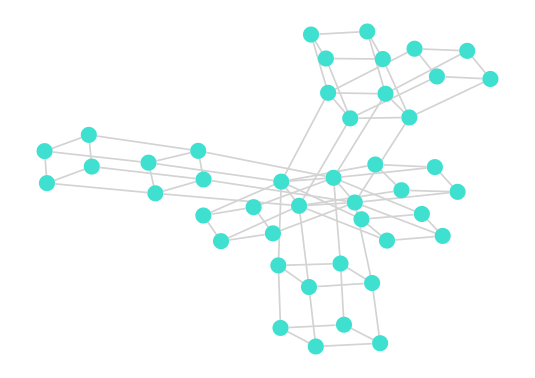

In [33]:
# metal plate
□ = Graph(4)
add_edge!(□, 1, 2)
add_edge!(□, 1, 3)
add_edge!(□, 2, 4)
add_edge!(□, 3, 4)

# airplane skeleton
skeleton = Graph(11)
add_edge!(skeleton, 1, 2)
add_edge!(skeleton, 2, 3)
add_edge!(skeleton, 3, 4)
add_edge!(skeleton, 4, 5)
add_edge!(skeleton, 3, 6)
add_edge!(skeleton, 3, 7)
add_edge!(skeleton, 3, 8)
add_edge!(skeleton, 3, 9)
add_edge!(skeleton, 9, 10)
add_edge!(skeleton, 9, 11)

gplot(cartesian_product(□, skeleton))

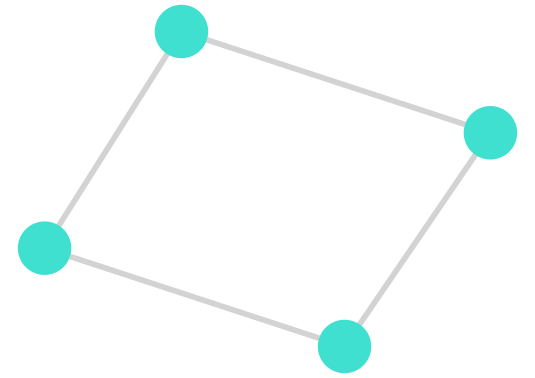

In [34]:
gplot(□)

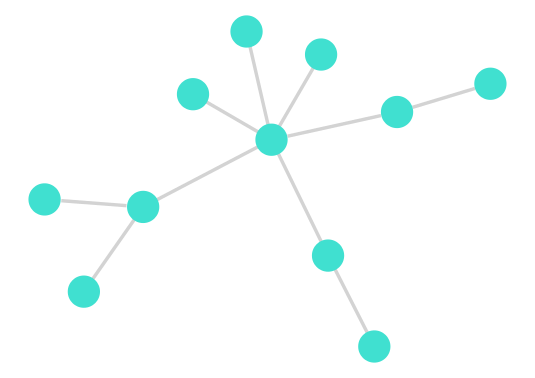

In [35]:
gplot(skeleton)

In [36]:
?cartesian_product

search: cartesian_product



```
cartesian_product(g, h)
```

Return the [cartesian product](https://en.wikipedia.org/wiki/Cartesian_product_of_graphs) of `g` and `h`.

### Implementation Notes

Preserves the eltype of the input graph. Will error if the number of vertices in the generated graph exceeds the eltype.

# Examples

```jldoctest
julia> using Graphs

julia> g = cartesian_product(star_graph(3), path_graph(3))
{9, 12} undirected simple Int64 graph

julia> collect(edges(g))
12-element Array{Graphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 2
 Edge 1 => 4
 Edge 1 => 7
 Edge 2 => 3
 Edge 2 => 5
 Edge 2 => 8
 Edge 3 => 6
 Edge 3 => 9
 Edge 4 => 5
 Edge 5 => 6
 Edge 7 => 8
 Edge 8 => 9
```


Source: https://fr.wikipedia.org/wiki/Produit_cart%C3%A9sien_(graphe)

----

Soient deux graphes $G=(V, E)$ et $G^{\prime}=\left(V^{\prime}, E^{\prime}\right)$. Le produit cartésien $H=G \square G^{\prime}$ est défini comme suit :
- $V(H)=\left\{\left(s s^{\prime}\right) \mid s \in V, s^{\prime} \in V^{\prime}\right\}$. Autrement dit, l'ensemble résultant des sommets $V(H)$ est le produit cartésien $V(G) \times V\left(G^{\prime}\right)$.
- $E(H)=\left\{e_{u u^{\prime}-v v^{\prime}} \mid\left(u=v \wedge d\left(u^{\prime}, v^{\prime}\right)=1\right) \vee\left(u^{\prime}=v^{\prime} \wedge d(u, v)=1\right)\right\}$. Autrement dit, deux sommets sont voisins si les sommets dont ils sont issus étaient voisins dans l'un des deux graphes.
----




Look at the help for function **inneighbors**.

In [37]:
# help for function inneighbors

In [38]:
?inneighbors

search: inneighbors



```
inneighbors(g, v)
```

Return a list of all neighbors connected to vertex `v` by an incoming edge.

### Implementation Notes

Returns a reference to the current graph's internal structures, not a copy. Do not modify result. If the graph is modified, the behavior is undefined: the array behind this reference may be modified too, but this is not guaranteed.

# Examples

```jldoctest
julia> g = SimpleDiGraph([0 1 0 0 0; 0 0 1 0 0; 1 0 0 1 0; 0 0 0 0 1; 0 0 0 1 0]);

julia> inneighbors(g, 4)
2-element Array{Int64,1}:
 3
 5
```


Here is a simple graph that will be used to test the functions you code in this notebook.

In [66]:
toulouse_neigh = barabasi_albert(1000, 1)

{1000, 999} undirected simple Int64 graph

Function **gplot** allows to plot a graph, with **nodefillc** a vector giving the color of each vertex. For some versions of jupyter notebook the plot inside the notebook is not done correctly, thus functions **draw** and **PNG** are used to save the plot in a .png image.

In [44]:
nodecolor = [colorant"lightseagreen"]
#gplot(toulouse_neigh,nodefillc=nodecolor)
Compose.draw(PNG("toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh, nodefillc = nodecolor))

**Question 1**: Write function **mean_degree** that computes the mean degree of the vertices of a graph. What is the mean degree of vertices of *toulouse_neigh* ? (expected answer: 1.998).

$\sum_{v \in V} \delta(v) = 2n$ (somme des degré est deux fois le nbr de sommets).
Soit $m$ le nombre d'arrete. On a donc $\frac{2n}{m}$

In [69]:
function mean_degree(graph)
    """Compute the mean degree of a graph

    PARAMS

        graph (LightGraphs): graph

    RETURN
        mean_degree (Float64): mean degree of vertices of graph"""
    return 2 * ne(graph) / nv(graph)
end

mean_degree (generic function with 1 method)

In [70]:
mean_degree(toulouse_neigh)

1.998

**Question 2**: Write a function **random_simple_graph** that creates a simple graph with m vertices and n edges. It must throw an error if too much edges are asked for the number of vertices.

In [94]:
using LinearAlgebra


2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

1

In [114]:
function random_simple_graph(m, n)
    """Create a random simple graph with m vertices and n edges
    A test must throw an error if there is too much edges for the number of vertices

    PARAMS
        graph (LightGraphs): graph
        m (Int64): number of vertices of the graph to create
        n (Int64): number of edges of the graph to create

    RETURN
        G (LightGraphs): random simple graph with m vertices and n edges"""
    graph = Graph(m, n)
    A = zeros(n, n)
    for i in 1:n
        for j in 1:i
            A[i, j] = A[j, i] = rand(0:1)
        end
    end
    return graph
end

random_simple_graph (generic function with 2 methods)

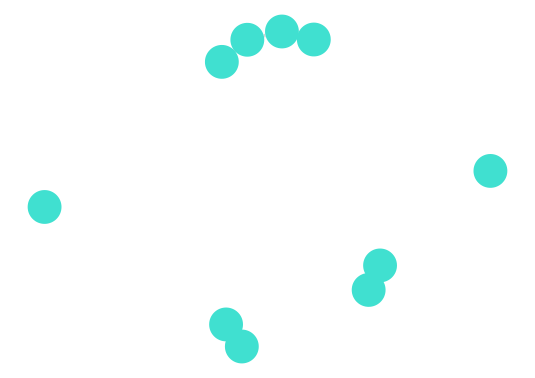

In [130]:
graphh = random_simple_graph(10, 5)

gplot(graphh)

In [131]:
adjacency_matrix(graphh)

10×10 SparseArrays.SparseMatrixCSC{Int64, Int64} with 10 stored entries:
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅

**Question 3**: Write function **connected_comp** that computes the connected components of a graph. Hint: you can start by a function computing the connected component of a vertex s of the graph. How many connected components does *toulouse_neigh* have ? (expected answer : 1)

In [ ]:
function connected_comp(graph)
    """Compute the connected components of a graph
    
    PARAMS
        graph (LightGraphs): graph
    
    RETURN
        component_list (Array{Int64,1}): list with each element the set of vertices indices
            of g that compose the connected component"""
    for v in vertices(G)
        println("vertex --> $v")
        connected_components = Set()
        neighbors = inneighbors(v)
        while size(neighbors) != 0
            new_neighbors = Set()
            for vv in vertices(neighbors)
                push(new_neighbors, inneighbors(vv))
            end
        end
    end
end

In [ ]:
# test on toulouse_neigh

Test **connected_comp** on a non connected graph of your choice.

In [ ]:
# test on a non connected graph

It is the end of this little tutorial on graphs. You can start the project on the notebook **graph21-22**